# global variables and imports

In [2]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/deep learning/final project/my_train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/deep learning/final project/my_test'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/deep learning/final project/my_validation'
base_dir = '/content/imgs' #where we download the data
seed = 42
## user and key (from kaggle account)
user = 'mohamedantargad'  
key = 'b4b6784f7fa24d1f5fd2a1db3d4959ac' 

In [3]:
import tensorflow.keras as keras
import numpy as np
from getpass import getpass
import os , shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import layers , models
from tensorflow.keras import optimizers
import tensorflow
import matplotlib.pyplot as plt
from keras.models import load_model

keras.__version__

'2.8.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c State-Farm-Distracted-Driver-Detection

100% 3.98G/4.00G [00:26<00:00, 188MB/s]
100% 4.00G/4.00G [00:26<00:00, 162MB/s]


In [7]:
!unzip State-Farm-Distracted-Driver-Detection.zip 

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  inflating: imgs/train/c7/img_57559.jpg  
  infla

# creating the validation data set

In [8]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = os.path.join(base_dir , 'train')

try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training,
# validation and test splits
try:
  os.mkdir(train_dir)
except:
  pass  

try:
  os.mkdir(validation_dir)
except:
  pass   

try:
  os.mkdir(test_dir)
except:
  pass   
 
## making the classes directories inside the train , validation and test directory
classes = os.listdir(original_dataset_dir)

for fclass in classes :
  try:
    dir = os.path.join(train_dir, fclass)
    os.mkdir(dir)
  except :
    pass

  try : 
    dir = os.path.join(validation_dir , fclass)
    os.mkdir(dir)
  except :
    pass

  try :
    dir = os.path.join(test_dir , fclass)
    os.mkdir(dir)
  except:
    pass


## filling the directories with images:
for fclass in classes:
  dir_src = os.path.join(original_dataset_dir , fclass)
  try:
    imgs = os.listdir(dir_src) ## the names of the images in the class
  except:
    print('please make sure you zip the file containing the data')
  train_imgs , test_val_imgs = train_test_split(imgs , test_size=0.4 , random_state=  42 , shuffle=True)
  val_imgs , test_imgs = train_test_split(test_val_imgs , test_size=0.5 , random_state=  42 , shuffle= True)

  for img in train_imgs:
    dir_destination = os.path.join(train_dir , fclass )
    dir_src_file = os.path.join(dir_src , img)
    dst_file = os.path.join(dir_destination, img)
    if os.path.exists(dst_file):
      continue
    shutil.copyfile(dir_src_file , dst_file)

  for img in val_imgs:
    dir_destination = os.path.join(validation_dir , fclass )
    dir_src_file = os.path.join(dir_src , img)
    dst_file = os.path.join(dir_destination, img)
    if os.path.exists(dst_file):
      continue
    shutil.copyfile(dir_src_file , dst_file)

  for img in test_imgs:
    dir_destination = os.path.join(test_dir , fclass )
    dir_src_file = os.path.join(dir_src , img)
    dst_file = os.path.join(dir_destination, img)
    if os.path.exists(dst_file):
      continue
    shutil.copyfile(dir_src_file , dst_file)
  

sanity check on train , vlaidation and test data

In [9]:

fclass = np.random.choice(classes)
print(fclass)
print(len(os.listdir(train_dir + '/' + fclass) ) )
print(len(os.listdir(validation_dir + '/' + fclass)))
print(len(os.listdir(test_dir + '/' + fclass)))

c1
1913
818
810


# making the image data generator

In [10]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

final_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        shuffle = True ,
        seed = seed,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = True,
        seed = seed ,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = True,
        seed = seed,
        class_mode='categorical')

final_test_generator = test_datagen.flow_from_directory(
        base_dir,
        classes = ['test'],
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 18860 images belonging to 10 classes.
Found 8087 images belonging to 10 classes.
Found 8117 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [11]:
for data_batch , labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


In [12]:
print(labels_batch)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# base line model (dense)

In [13]:
model = models.Sequential()
model.add(layers.Reshape((150*150*3,)))
model.add(layers.Dense(512 , activation = 'relu' , name = 'layer1' , input_shape = (150*150*3,)))
model.add(layers.Dense(256 , activation = 'relu' , name = 'layer2' ) )
model.add(layers.Dense(128 , activation = 'relu' , name = 'layer3' ) )
model.add(layers.Dense(128 , activation = 'relu' , name = 'layer4' ) )

model.add( layers.Dense(10 , activation = 'softmax' , name = 'final_layer') )

model.build((None , 150 ,150,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 67500)             0         
                                                                 
 layer1 (Dense)              (None, 512)               34560512  
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 layer4 (Dense)              (None, 128)               16512     
                                                                 
 final_layer (Dense)         (None, 10)                1290      
                                                                 
Total params: 34,742,538
Trainable params: 34,742,538
No

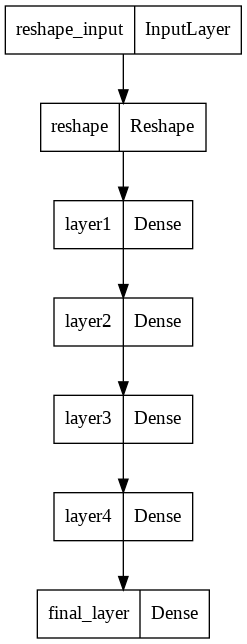

In [14]:
plot_model(model)

### define loss and activation function

In [15]:
model.compile(optimizer = 'adam' , 
              loss = 'categorical_crossentropy' ,
              metrics = ['accuracy'] 
              )

In [16]:
history = model.fit(train_generator , 
                    batch_size = 20,
                    epochs = 5 ,
                    steps_per_epoch= None , ## = 22424//batch_size (all the data // batch size in the generator) 
                    validation_data= validation_generator ,
                    validation_steps= None
                  
                    )



Epoch 1/5
943/943 [==============================] - 2633s 3s/step - loss: 1.5710 - accuracy: 0.5638 - val_loss: 0.3504 - val_accuracy: 0.8950
Epoch 2/5
943/943 [==============================] - 159s 168ms/step - loss: 0.4011 - accuracy: 0.8665 - val_loss: 0.2286 - val_accuracy: 0.9217
Epoch 3/5
943/943 [==============================] - 157s 167ms/step - loss: 0.2609 - accuracy: 0.9156 - val_loss: 0.2430 - val_accuracy: 0.9185
Epoch 4/5
943/943 [==============================] - 160s 170ms/step - loss: 0.2248 - accuracy: 0.9296 - val_loss: 0.2223 - val_accuracy: 0.9280
Epoch 5/5
943/943 [==============================] - 157s 166ms/step - loss: 0.1939 - accuracy: 0.9388 - val_loss: 0.2609 - val_accuracy: 0.9129


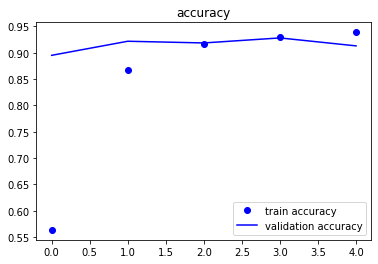

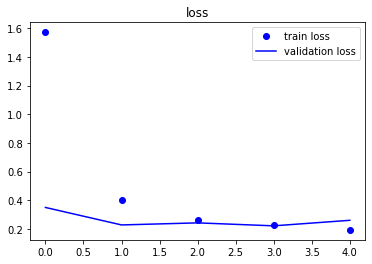

In [17]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']


epochs = range(len(train_accuracy))

plt.plot(epochs , train_accuracy,'bo' , label = 'train accuracy')
plt.plot(epochs , validation_accuracy, 'b' , label = 'validation accuracy')
plt.title('accuracy')
plt.legend()


plt.figure()
plt.plot(epochs , train_loss ,'bo', label = 'train loss')
plt.plot(epochs , validation_loss ,'b', label = 'validation loss')
plt.title('loss')
plt.legend()

plt.show()

model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/final project/baseline_dense.h5')

## how to load the base line dense model

In [18]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/final project/baseline_dense.h5')
#preds = model.predict_generator(test_generator)
model.evaluate(test_generator) #make shuffle = False in the test_generator


406/406 [==============================] - 750s 2s/step - loss: 0.2692 - accuracy: 0.9107


[0.2691672742366791, 0.9106813073158264]

# the base line model conv based

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))#, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [20]:
history2 = model.fit(train_generator , 
                    batch_size = 20,
                    epochs = 5 ,
                    steps_per_epoch= None , ## = 22424//batch_size (all the data // batch size in the generator) 
                    validation_data= validation_generator ,
                    validation_steps= None
                  
                    )

Epoch 1/5
943/943 [==============================] - 173s 174ms/step - loss: 0.8994 - acc: 0.6976 - val_loss: 0.1503 - val_acc: 0.9606
Epoch 2/5
943/943 [==============================] - 164s 174ms/step - loss: 0.2517 - acc: 0.9247 - val_loss: 0.0651 - val_acc: 0.9829
Epoch 3/5
943/943 [==============================] - 162s 172ms/step - loss: 0.1574 - acc: 0.9502 - val_loss: 0.0447 - val_acc: 0.9884
Epoch 4/5
943/943 [==============================] - 164s 174ms/step - loss: 0.1250 - acc: 0.9616 - val_loss: 0.0483 - val_acc: 0.9858
Epoch 5/5
943/943 [==============================] - 163s 173ms/step - loss: 0.1076 - acc: 0.9674 - val_loss: 0.0274 - val_acc: 0.9927


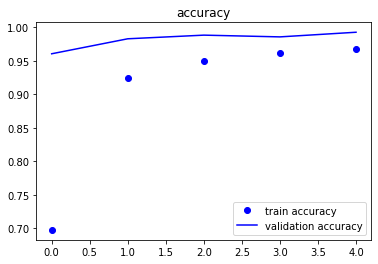

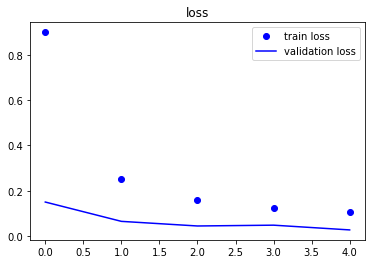

In [21]:
train_accuracy = history2.history['acc']
validation_accuracy = history2.history['val_acc']
train_loss = history2.history['loss']
validation_loss = history2.history['val_loss']


epochs = range(len(train_accuracy))

plt.plot(epochs , train_accuracy,'bo' , label = 'train accuracy')
plt.plot(epochs , validation_accuracy, 'b' , label = 'validation accuracy')
plt.title('accuracy')
plt.legend()


plt.figure()
plt.plot(epochs , train_loss ,'bo', label = 'train loss')
plt.plot(epochs , validation_loss ,'b', label = 'validation loss')
plt.title('loss')
plt.legend()

plt.show()
model.save('/content/drive/MyDrive/Colab Notebooks/deep learning/final project/baseline_conv.h5')

In [22]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/deep learning/final project/baseline_conv.h5')
#preds = model.predict_generator(test_generator)
model.evaluate(test_generator) #make shuffle = False in the test_generator


406/406 [==============================] - 48s 119ms/step - loss: 0.0259 - acc: 0.9920


[0.025905558839440346, 0.9919921159744263]

### comment : 
### base line model dense : 95.8% on test data  

### base line model conv : 99.3% on test data 

note : these values may differe cause shuffle was true (by default) in image data generator.flow from directory and seed was not specified